In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("breast_cancer.csv", index_col=0)

X=df.drop('label',axis=1)

y=df['label']

Y = pd.get_dummies(y).values
X = X.values


C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4201 - loss: 0.7811 - val_accuracy: 0.6579 - val_loss: 0.6187
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6276 - loss: 0.6177 - val_accuracy: 0.6140 - val_loss: 0.6060
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.5651 - val_accuracy: 0.6316 - val_loss: 0.5662
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5179 - val_accuracy: 0.8246 - val_loss: 0.5380
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.4877 - val_accuracy: 0.8684 - val_loss: 0.4509
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8842 - loss: 0.4077 - val_accuracy: 0.8596 - val_loss: 0.3980
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.3583 - val_accuracy: 0.9035 - val_loss: 0.3747
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.3346 - val_accuracy: 0.8772 - val_loss

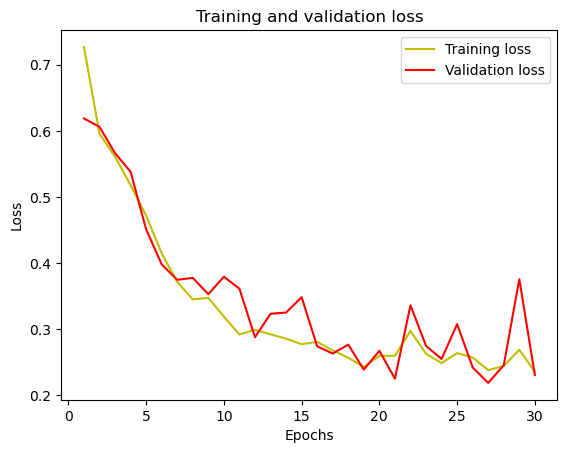

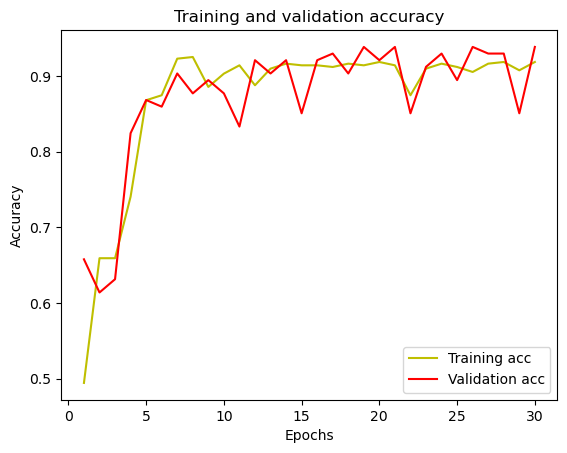

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

[[42  5]
 [ 2 65]]


In [5]:
# 훈련, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 정의
model = Sequential()

model.add(Dense(10, input_shape=(30,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(2, activation='softmax'))

# 옵티마이저 설정 및 컴파일
optimizer = Adam(learning_rate=0.001)  # 학습률 설정 0.004는 너무 그래프가 들쭉날쭉 해서 이렇게 함, 0.001이 기본인데 젤 좋은듯
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 모델 예측
y_pred = model.predict(X_test)


# 예측 확률을 0.5 기준으로 이진 클래스로 변환
#y_pred_class = (y_pred > 0.5).astype(int)



# 예측 확률에서 가장 높은 값을 가진 클래스를 선택 (다중 클래스 분류이므로)
y_pred_class = np.argmax(y_pred, axis=1)

# 원-핫 인코딩된 y_test를 실제 클래스 값으로 변환
y_test_class = np.argmax(y_test, axis=1)


import matplotlib.pyplot as plt
import seaborn as sns

# 손실 그래프
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 평가 - confusion matrix, classification report
from sklearn.metrics import classification_report, confusion_matrix

# 다중 클래스 분류이므로 클래스 값으로 변환된 레이블을 사용
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))